<a href="https://colab.research.google.com/github/vcorredorg/SenalesySistemas2025/blob/main/Conceptos_b%C3%A1sicos_Se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Conceptos Básicos de Señales
###Ejercicio cuaderno IntroNumpy SyS

In [24]:
#Librerías
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.spatial.distance import cdist

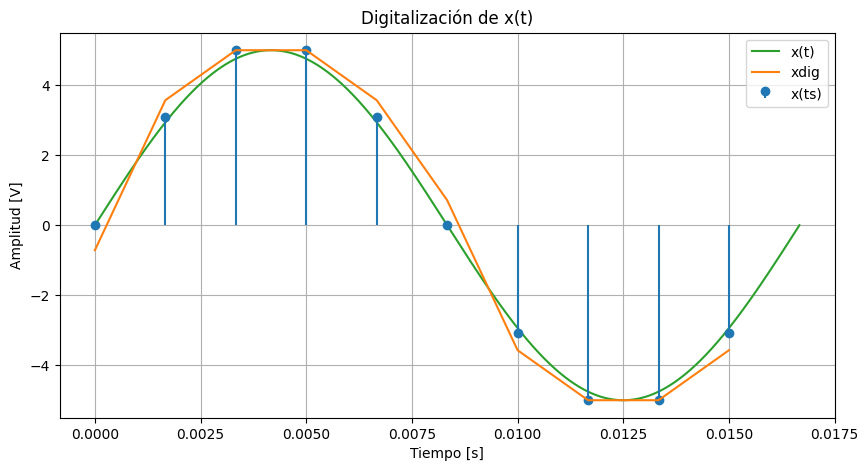

In [25]:
#Proceso de acondicionamiento cero y pendiente utilizando una función seno:
#Parámetros señal
K = 500 # número de muestras
To = 1/60 # periodo función
Fo = 60 #frecuencia
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = To #tiempo final
Fs = 10*Fo #asegurar nyquist
Ts = 1/Fs
t= np.linspace(0, tf, 30000 ) #tiempo continuo [s]
ts= np.arange(0, tf, Ts)      #tiempo dicreto [s]
x = A * np.sin(2*np.pi*Fo*t) #vector de amplitud

#Representación entre -5V y 5V
def my_ceropen(x, ymin=-5, ymax=5):
  xmax = max(x)
  xmin = min(x)
  m = (ymax - ymin) / (xmax - xmin)
  c = ymin - m * xmin
  y = m *x + c
  return y
xt = my_ceropen(x)

#Discretización
xts= A * np.sin(2*np.pi*Fo*ts)
xts = my_ceropen(xts)

#Cuantización
n= 2**3 #numero de estados
levels= np.linspace(min(xt),max(xt), n )        #cantidad de niveles
distance= np.abs(xts[:, None]- levels[None, :]) #distancia de xts a cada nivel
ind= np.argmin(distance, axis=1)                #indice del nivel más cercano

#Señal digitalizada
xdig= levels[ind] #vector de niveles que contiene el vector de indices

#Visualización
plt.figure(figsize=(10,5))                                  #tamaño
plt.title("Digitalización de x(t)")                         #titulo
plt.plot(t, xt, label='x(t)', color='C2', linewidth=1.5)    #señal continua
plt.stem(ts, xts, label='x(ts)', basefmt=" ")               #señal discreta
plt.plot(ts, xdig, label='xdig', color='C1', linewidth=1.5) #señal digital
plt.xlabel('Tiempo [s]')                                    #label eje x
plt.ylabel('Amplitud [V]')                                  #label eje y
plt.grid(True)                                              #grilla
plt.legend()                                                #leyenda

###Ejercicio cuaderno Señales Estandar

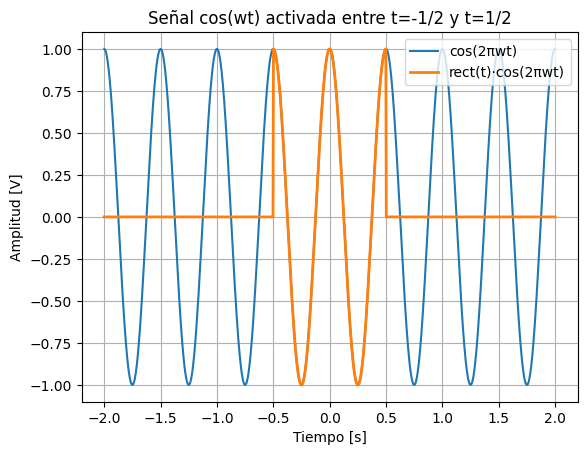

In [26]:
#Use la función rect(t) para construir una funcion cos(wt) con w=2 que se enciende en t=-1/2 y se apaga en t=1/2

# Variable simbólica
t = sym.Symbol('t', real=True)

# Definición simbólica de rect(t)
rect = sym.Heaviside(t + 1/2) - sym.Heaviside(t - 1/2)

# Parámetros
A = 1
w = 2  # frecuencia angular

# Señales simbólicas
x = A * sym.cos(2 * np.pi * w * t)
xrect = x * rect  # señal recortada por la ventana rectangular

# Conversión simbólico → numérico
x_func = sym.lambdify(t, x, 'numpy')
xrect_func = sym.lambdify(t, xrect, 'numpy')

# Dominio temporal (numérico)
t_vals = np.linspace(-2, 2, 1000)

# Evaluación numérica
x_vals = x_func(t_vals)
xrect_vals = xrect_func(t_vals)

# Gráfica
plt.plot(t_vals, x_vals, label='cos(2πwt)')
plt.plot(t_vals, xrect_vals, label='rect(t)·cos(2πwt)', linewidth=2)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend()
plt.grid(True)
plt.title('Señal cos(wt) activada entre t=-1/2 y t=1/2')
plt.show()

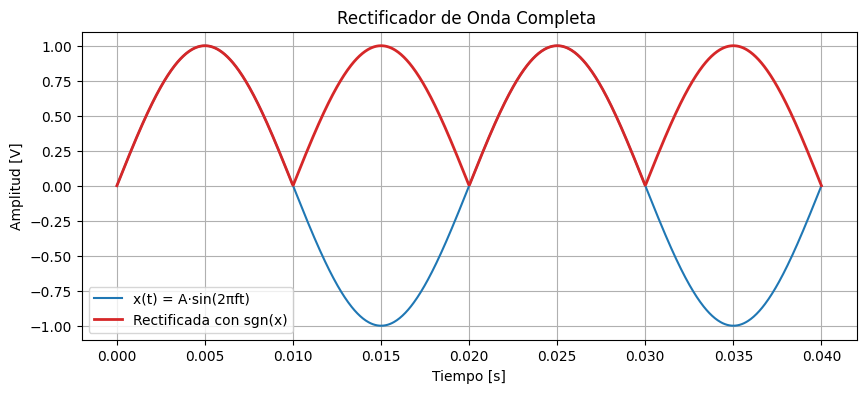

In [27]:
#Genere un rectificador de onda completa utilizando la función sgn(t)
# Parámetros de la señal
A = 1         # Amplitud
f = 50        # Frecuencia [Hz]
t = np.linspace(0, 2/f, 1000)  # Dos períodos

# Señal senoidal original
x = A * np.sin(2*np.pi*f*t)

# Para rectificar, multiplicamos por su propio signo:
y = x * np.sign(x)


plt.figure(figsize=(10,4))
plt.plot(t, x, label='x(t) = A·sin(2πft)', color='C0')
plt.plot(t, y, label='Rectificada con sgn(x)', color='C3', linewidth=2)
plt.title('Rectificador de Onda Completa ')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.legend()
plt.show()


###Ejercicos cuaderno Operaciones señales continuas

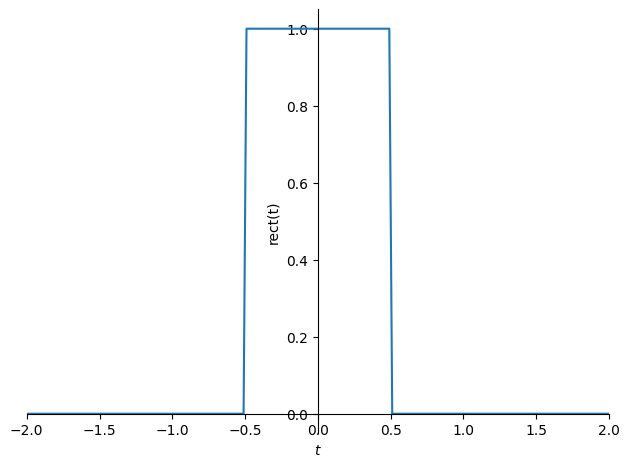

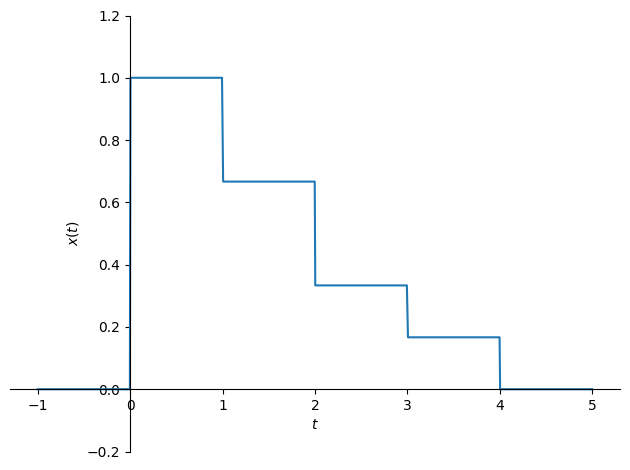

In [31]:
#Agregar otro escalón al principio de la señal escalera.
t = sym.symbols('t', real=True) # Redefine t as a SymPy symbol
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')

#los rect desplazados se acoplan con escalamientos diferentes
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2) + 1/6*rect.subs(t, t-7/2)
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

###Evaluar la expresion Integral a evaluar:

$$\int_{-\infty}^{\infty} t^{4} e^{\cos(t)} \cos(2t)\, \delta(2t - 5)\, dt$$


In [29]:
t= sym.symbols('t')
delta= sym.DiracDelta(2*t-5)
f= t**4*sym.exp(sym.cos(t))*sym.cos(2*t)*delta
fint=sym.integrate(f, (t, -sym.oo, sym.oo ))
fint

625*exp(cos(5/2))*cos(5)/32